# Load and render Knowledge Bases
Copyright (c) 2022 Siemens AG Oesterreich
SPDX-License-Identifier: MIT


- How to load a knowledge base from a list of facts with the clorm integration.
- How to render a knowledge based with the clingraph integration

In [1]:
%cd ..

/Users/susana/Documents/Education/PhD/ExternalProjects/OOASP/asp_interactive_configuration


### Select the correct settings for the encodings

In [2]:
import ooasp.settings as settings
settings.init('defined')

### Knowledge Base

Import the `OOASPKnowledgeBase` classs

In [3]:
from ooasp.kb import OOASPKnowledgeBase

Create an `OOASPKnowledgeBase` from a logic program

#### Racks example

In [4]:
racks_kb = OOASPKnowledgeBase.from_file("racks_v1","./examples/defined/racks/kb.lp")

Print the object (This uses the asp string representation of the factbase)

In [5]:
print(racks_kb)

%---- OOASPKnowledgeBase (racks_v1) ------
ooasp_assoc(rack_frames,rack,1,1,frame,4,8).
ooasp_assoc(frame_modules,frame,1,1,module,0,5).
ooasp_assoc(element_modules,element,0,1,module,1,4).
ooasp_attr(frame,frame_position,int).
ooasp_attr_maxInclusive(frame,frame_position,8).
ooasp_attr_minInclusive(frame,frame_position,1).
ooasp_class(object).
ooasp_class(rack).
ooasp_class(rackSingle).
ooasp_class(rackDouble).
ooasp_class(frame).
ooasp_class(element).
ooasp_class(elementA).
ooasp_class(elementB).
ooasp_class(elementC).
ooasp_class(elementD).
ooasp_class(module).
ooasp_class(moduleI).
ooasp_class(moduleII).
ooasp_class(moduleIII).
ooasp_class(moduleIV).
ooasp_class(moduleV).
ooasp_kb.
ooasp_subclass(rack,object).
ooasp_subclass(rackSingle,rack).
ooasp_subclass(rackDouble,rack).
ooasp_subclass(frame,object).
ooasp_subclass(element,object).
ooasp_subclass(elementA,element).
ooasp_subclass(elementB,element).
ooasp_subclass(elementC,element).
ooasp_subclass(elementD,element).
ooasp_subcla

In [6]:
racks_kb.associated_classes('element')

AttributeError: 'OOASPKnowledgeBase' object has no attribute 'associated_classes'

In [6]:
racks_kb.save_png("examples/racks")

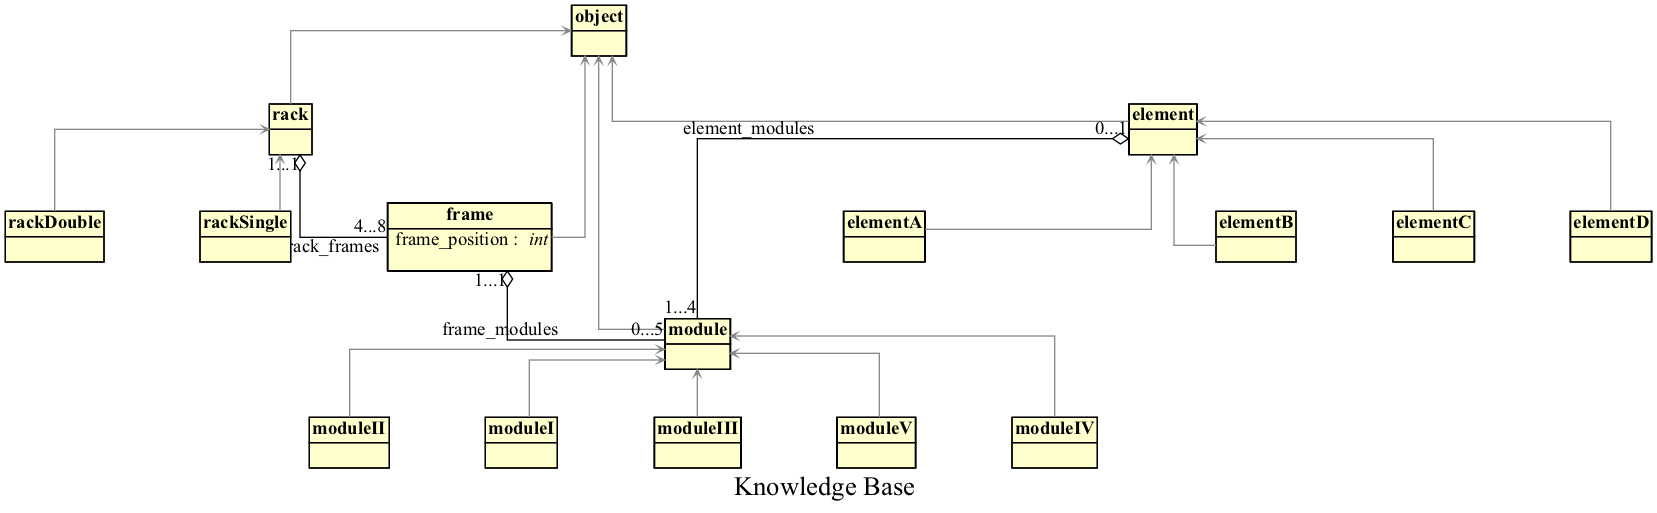

In [7]:
from IPython.display import Image
Image("examples/racks/racks_v1.png")

Query the factbase like a database

In [8]:
clorm_class = racks_kb.UNIFIERS.Class
clorm_subclass = racks_kb.UNIFIERS.SubClass
q = racks_kb.fb.query(clorm_class,clorm_subclass).join(clorm_class.name==clorm_subclass.sub_class)
q = q.where(clorm_subclass.super_class=="rack").select(clorm_class)

In [9]:
print(list(q.all()))

[ooasp_class(racks_v1,rackSingle), ooasp_class(racks_v1,rackDouble)]


In [10]:
print([c.name for c in q.all()])

['rackSingle', 'rackDouble']


#### Metro example

In [11]:
metro_kb = OOASPKnowledgeBase.from_file("metro_v1","./examples/metro/kb.lp")

In [12]:
print(metro_kb)

%---- OOASPKnowledgeBase (metro_v1) ------
ooasp_assoc(metro_v1,wagon_handrail,wagon,1,1,handrail,0,1).
ooasp_assoc(metro_v1,wagon_seats,wagon,1,1,seat,0,80).
ooasp_attribute(metro_v1,wagon,nr_passengers,int).
ooasp_attribute(metro_v1,wagon,nr_seats,int).
ooasp_attribute(metro_v1,wagon,standing_room,int).
ooasp_attribute(metro_v1,seat,seat_type,str).
ooasp_attribute(metro_v1,seat,seat_color,str).
ooasp_attribute(metro_v1,handrail,handrail_type,str).
ooasp_attribute_enum(metro_v1,seat,seat_type,standard).
ooasp_attribute_enum(metro_v1,seat,seat_type,premium).
ooasp_attribute_enum(metro_v1,seat,seat_type,special).
ooasp_attribute_enum(metro_v1,seat,seat_color,blue).
ooasp_attribute_enum(metro_v1,seat,seat_color,red).
ooasp_attribute_enum(metro_v1,seat,seat_color,white).
ooasp_attribute_enum(metro_v1,handrail,handrail_type,standard).
ooasp_attribute_enum(metro_v1,handrail,handrail_type,premium).
ooasp_attribute_maxInclusive(metro_v1,wagon,nr_passengers,200).
ooasp_attribute_maxInclusive(m

In [13]:
metro_kb.save_png("examples/metro")

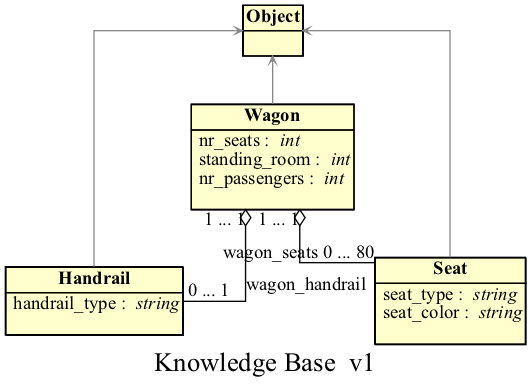

In [14]:
from IPython.display import Image
Image("examples/metro/v1.png")